Imports

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

Functions

In [3]:
def crop_barcode(img):
    # Find contours in the binary image
    contours, _ = cv.findContours(img, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

    # Find the horizontal limits of the barcode
    x_min = min([cv.boundingRect(contour)[0] for contour in contours])  # Leftmost x-coordinate
    x_max = max([cv.boundingRect(contour)[0] + cv.boundingRect(contour)[2] for contour in contours])  # Rightmost x-coordinate

    # Assume the largest contour corresponds to the vertical extent of the barcode
    largest_contour = max(contours, key=cv.contourArea)
    _, y, _, h = cv.boundingRect(largest_contour)  # Get the y and height (vertical cropping)

    # Crop the image so that only the barcode is visible
    cropped_img = img[y:y + h, x_min:x_max]
    
    # Draw the bounding rectangle of the largest contour in green
    cv.rectangle(img, (x_min, y), (x_max, y + h), (0, 255, 0), 2)

    # Draw all contours in red
    contour_img = cv.cvtColor(img, cv.COLOR_GRAY2BGR)  # Convert to BGR for colored drawing
    cv.drawContours(contour_img, contours, -1, (0, 0, 255), 2)  # Draw all contours in red

    return cropped_img, contour_img

def crop_barcode2(img):

    # Find contours in the binary image
    contours, _ = cv.findContours(img, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

    # Assume the largest contour probably corresponds to a wide bar in the barcode
    largest_contour = max(contours, key=cv.contourArea)
    largest_contour_area = cv.contourArea(largest_contour)

    # Find the horizontal limits of the barcode
    x_min = None
    x_max = None
    for contour in contours:
        contour_area = cv.contourArea(contour)
        if contour_area >= 0.2 * largest_contour_area:  # Check if the contour area is at least 20% of the largest contour
            x, _, w, _ = cv.boundingRect(contour)
            if x_min is None or x < x_min:
                x_min = x
            if x_max is None or x + w > x_max:
                x_max = x + w

    # If no valid contours are found, use the entire width of the image
    if x_min is None or x_max is None:
        x_min = 0
        x_max = img.shape[1]

    # Get the vertical limits from the largest contour
    _, y, _, h = cv.boundingRect(largest_contour)

    # Crop the image so that only the barcode is visible
    cropped_img = img[y:y + h, x_min:x_max]

    # Draw the bounding rectangle of the largest contour in green
    cv.rectangle(img, (x_min, y), (x_max, y + h), (0, 255, 0), 2)

    # Draw all contours in red
    contour_img = cv.cvtColor(img, cv.COLOR_GRAY2BGR)  # Convert to BGR for colored drawing
    cv.drawContours(contour_img, contours, -1, (0, 0, 255), 2)  # Draw all contours in red

    return cropped_img, contour_img

def display_image(img, title):
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

In [4]:
# Read the image
# img = cv.imread('Samples/image1.jpg', cv.IMREAD_GRAYSCALE)
# img = cv.imread('Samples/Test Cases/01 - lol easy.jpg', cv.IMREAD_GRAYSCALE)
# img = cv.imread('Samples/Test Cases/02 - still easy.jpg', cv.IMREAD_GRAYSCALE)
# img = cv.imread('Samples/Test Cases/03 - eda ya3am ew3a soba3ak mathazarsh.jpg', cv.IMREAD_GRAYSCALE)
img = cv.imread('Samples/Test Cases/04 - fen el nadara.jpg', cv.IMREAD_GRAYSCALE)
# img = cv.imread('Samples/Test Cases/05 - meen taffa el nour!!!.jpg', cv.IMREAD_GRAYSCALE)
# img = cv.imread('Samples/Test Cases/06 - meen fata7 el nour 333eenaaayy.jpg', cv.IMREAD_GRAYSCALE)
# img = cv.imread('Samples/Test Cases/07 - mal7 w felfel.jpg', cv.IMREAD_GRAYSCALE)
# img = cv.imread('Samples/Test Cases/08 - compresso espresso.jpg', cv.IMREAD_GRAYSCALE)
# img = cv.imread('Samples/Test Cases/09 - e3del el sora ya3ammm.jpg', cv.IMREAD_GRAYSCALE)
# img = cv.imread('Samples/Test Cases/10 - wen el kontraastttt.jpg', cv.IMREAD_GRAYSCALE)
# img = cv.imread('Samples/Test Cases/11 - bayza 5ales di bsara7a.jpg', cv.IMREAD_GRAYSCALE)



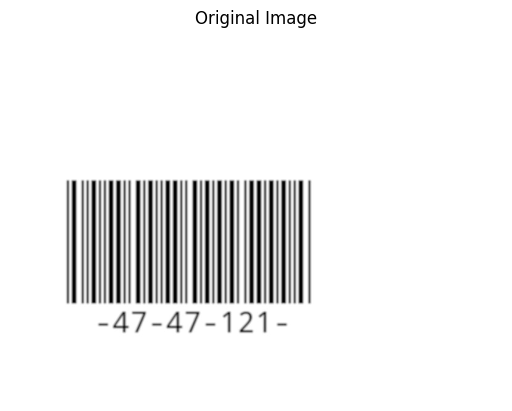

In [47]:
display_image(img,'Original Image')



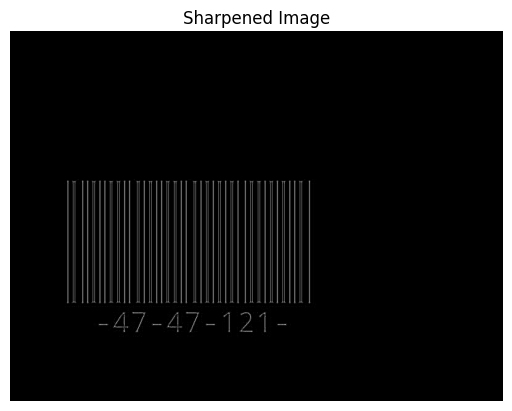

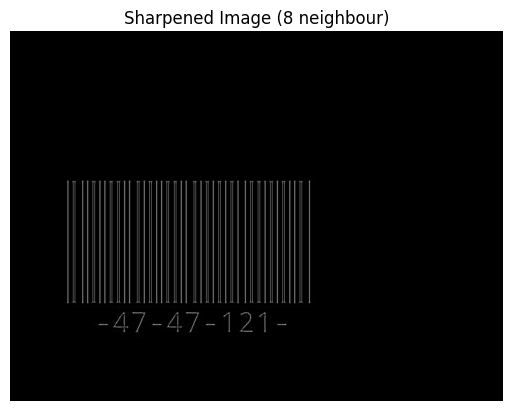

In [21]:
laplacian_kernel = np.array([[0, 1, 0],
                             [1, -4, 1],
                             [0, 1, 0]])
laplacian_kernel_8neighbor = np.array([[1, 1, 1],
                                       [1, -8, 1],
                                       [1, 1, 1]])
filtered_image = cv.filter2D(img, -1, laplacian_kernel)
filtered_image_8neighbor = cv.filter2D(img, -1, laplacian_kernel_8neighbor)

display_image(filtered_image,'Sharpened Image')
display_image(filtered_image,'Sharpened Image (8 neighbour)')

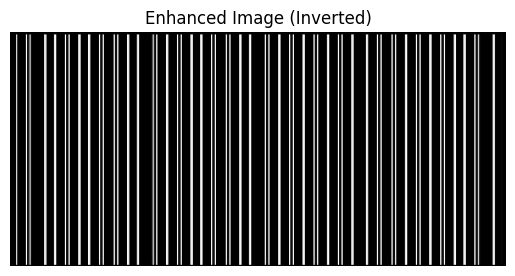

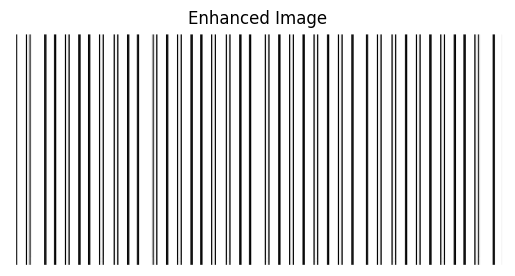

In [27]:
cropped_image,_ = crop_barcode(filtered_image_8neighbor)
display_image(cropped_image,'Enhanced Image (Inverted)')
display_image(cv.bitwise_not(cropped_image),'Enhanced Image')

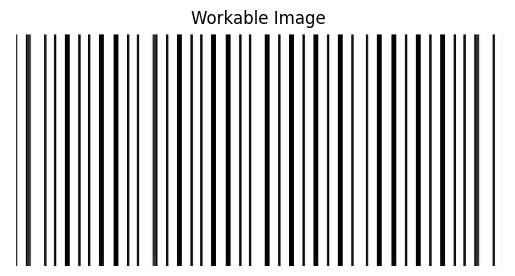

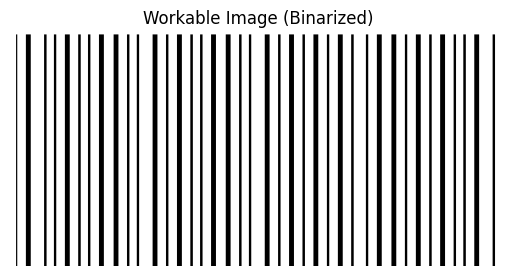

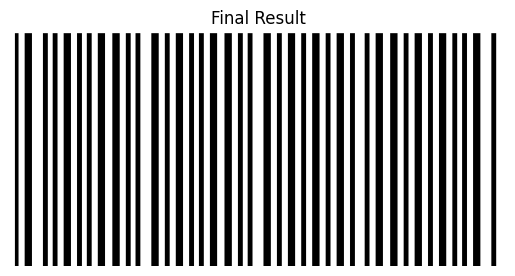

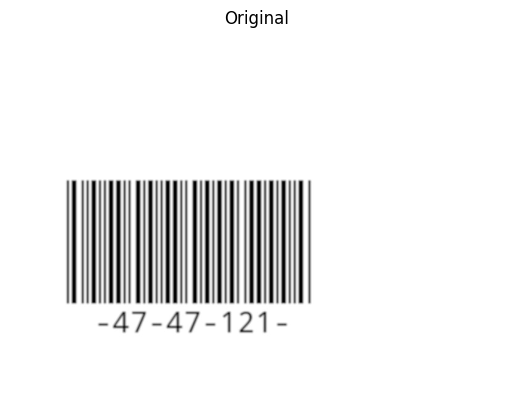

In [51]:

#Erode and OPEN are the inverse of the actual operations we want to do, but thats because the white pixels are intensity of 1 and black 0, 
# and we want to work on the black, hence we perform inverse operations. so when there is opening, i am just closing the black bars and same for eroding, which is dilating the black bars.
kernel = np.ones((3, 3), np.uint8)
closed_image = cv.morphologyEx(cv.bitwise_not(cropped_image), cv.MORPH_OPEN, kernel)
display_image(closed_image,'Workable Image')
_,img_binary = cv.threshold(closed_image, 127, 255, cv.THRESH_BINARY)
display_image(img_binary,'Workable Image (Binarized)')
thickened_bars = cv.erode(img_binary, kernel, iterations=1)
display_image(thickened_bars,'Final Result')
display_image(img,'Original')


